# Week 1 Programming Task: Categorization

In this task we will:
 - generate some labelled data from given prototypes
 - calculate the centroids of the labelled data
 - examine how a Voronoi diagram partitions the space
 - use the new centroids to reclassify the data according to the Voronoi diagram
 - calculate the distances between the old classifications and the new classifications
 

## Preliminaries

In [21]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

We firstly need some data that we can examine. You can either import a dataset that you aready know about, or generate artificial data by completing the code below. 

If you import your own dataset, please make sure that it is labelled, and 2-dimensional, i.e. has 2 features.

## 1. Data generation (5 pts)
We will generate data by selecting points from 2-dimensional spherical normal distributions centered on a number of prototypical points.

 1. Use the given values, or generate your own
 2. Set up a dictionary in which to store your data 
 3. For each prototype, generate 50-100 points from a spherical normal distribution with mean the value of the prototype and the corresponding standard deviation
 4. Store the datapoints in the dictionary with keys corresponding to the names of your prototypes (these can be just 1, 2, 3, ..., k) 

In [22]:
# 1. Use the values below or generate your own
prototypes = np.array([[7, 8],[7.5, 7],[9, 4.5],[4, 2], [6, 2]])
stdevs = np.array([1, 0.3, 0.7, 0.8, 0.7, 0.7])
k = len(prototypes)

In [23]:
# 2. Set up an empty dictionary to store your data (2 pts)
data = {} # Here we initialise an empty dictionary

# 3. Use a for loop to loop over the number of prototypes. For each i, we use the function 
# np.random.multivariate_normal to generate 100 datapoints.
# The datapoints are drawn from a spherical normal distribution with mean prototypes[i] 
# and standard deviation stdevs[i].
for i in range(k):
    x, y = np.random.multivariate_normal(prototypes[i], (stdevs[i]**2)*np.eye(2), 100).T
    
    # 4. Within the loop, store the datapoints in the dictionary as a list or numpy array with shape (n, 2) (3 pts)
    xyList = np.array([x,y])
    data[i] = xyList.T

## 2. Visualisation (8 points)
To visualize the data:
1. initialize a figure and an axis using `plt.subplots()` (3 pts)
2. For each set of datapoints that you've stored in your datastructure, plot the data using `plt.scatter()` (5 pts)

You should get something like:
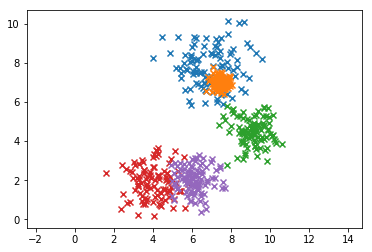

(1.776267293488238,
 11.320070594806166,
 -0.5604292154038355,
 10.604301592614487)

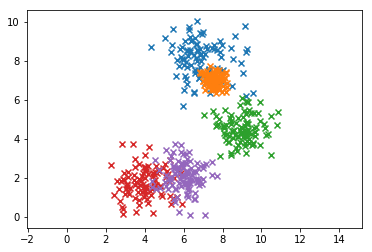

In [24]:
# 1. initialize a figure and an axis (3 pts)
fig, ax = plt.subplots()
# 2. Set up a for loop to iterate over the keys of the dictionary. (5 pts)
for key in data:
    # plt.scatter(")" takes a list of x values and a list of y values, 
    # so we assign the transpose of the datapoints to the tuple (x, y)
    (x, y) = data[key].T
    plt.scatter(x, y, marker = 'x')

    # For each key, plot the values stored at that key using plt.scatter
plt.axis('equal')

## 3. Generating prototypes from labelled data (10 points)

The data we have just generated (or imported) is *labelled* - we know which point belongs to which category. We will now write a function that calculates the centroid of each category.

The function should be called `calculate_centroids`. It should take a dictionary of labelled data as input, and return a numpy array of shape (k, 2) of the centroids of each dataset in the dictionary.

Within the function:
1. Create a numpy array to store the centroids. (4 pts)
2. Set up a for loop to iterate over your dictionary of labelled data (2 pts)
3. For each dataset in the dictionary:
    - take the mean of the points in the dataset (this is the centroid) (2 pts)
    - store the centroid in the variable you created (2 pts)
4. Return the array of centroids

In [25]:
# function to calculate the centroids
def calculate_centroids(labelled_data):
    allCentroids = [] #empty array to store centroids
    for dataset in labelled_data: #loop through dictionairy and store centroids
        N = len(labelled_data[dataset]) #The length of the input array is equal to N
        xCoords = 0 #set total of x coords combined to 0
        yCoords = 0 #set total of y coords combined to 0
        for i in labelled_data[dataset]: #loop through the array and sum the x-/ycoords
            xCoords += i[0]
            yCoords += i[1]
        allCentroids.append([xCoords/N, yCoords/N]) #calculate centroids
    return np.array(allCentroids) #convert array to numy array

In [26]:
# calculate and print the centroids
centroids = calculate_centroids(data)
print(centroids)

[[6.95520817 8.0429915 ]
 [7.56848382 7.03244466]
 [8.97832117 4.51813911]
 [4.01349176 1.77134476]
 [5.99532602 2.08246464]]


### Plotting (5 pts)
Plot the centroids on the same axis that you plotted the original data.

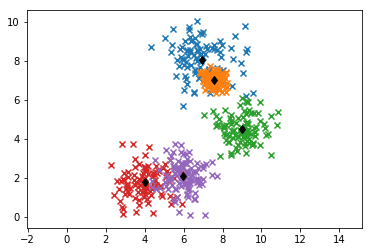

In [27]:
# Plot the centroids on the previous axis
for centroid in centroids:
    (x, y) = centroid
    ax.plot(x, y, marker = 'd',color='black')    

fig 

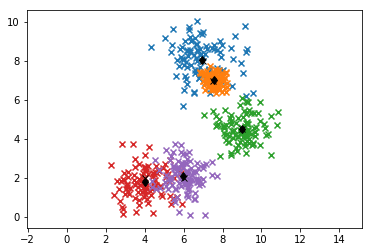

In [28]:
#  On the same axis, plot the original prototypes
for prototype in prototypes:
    (x, y) = prototype
    ax.plot(x, y, marker = 'x',color='black') 
    
fig

Are the original prototypes close to the calculated centroids? -) The prototypes are close to the calculated centroids as you can see in the figure above.

## Calculating Euclidean distance (12 pts)

Write a function that calculates the Euclidean distance between points (5 pts)
Calculate the distances between the original prototypes and the calculated centroids. (5 pts)

Which have changed the most? Why do you think that is? (2 pts) -)You expect the blue and the red to chage the most since their points were generated with the highest standard deviation. But since the points are generated random it can vary.

In [29]:
# Write a function that takes two points as input and returns the Euclidean distance between them as output
def euc_dist(x, y):
    return (np.sqrt(sum((x-y)**2)))

In [30]:
# Use the function euc_dist to calculate the distances between the prototypes and the centroids
# Set up a for loop that runs over the number of centroids, and use euc_dist to calculate the distance between
# each pair of prototypes and centroids
for i in range(len(centroids)):
    distance = euc_dist(centroids[i],prototypes[i])
    print('The distance between prototype ' + str(i+1) + ' and centroid ' + str(i+1) + ' is: ' + str(distance))

The distance between prototype 1 and centroid 1 is: 0.062085240818042724
The distance between prototype 2 and centroid 2 is: 0.07578052970875152
The distance between prototype 3 and centroid 3 is: 0.028266569427243777
The distance between prototype 4 and centroid 4 is: 0.2290529366341223
The distance between prototype 5 and centroid 5 is: 0.08259699056027325


## Voronoi tessellations (10 pts)
We will now draw a Voronoi tessellation of the space. To compute the Voronoi tessellation we use scipy's built in function `Voronoi` and `voronoi_plot_2d`. Remember that you can type in `?Voronoi` to find out how to use the function.

Compute the Voronoi tessellation and assign to a variable (4 pts)

Plot the Voronoi tessellation on the previous axis (4 pts)

What do you notice about the tessellation? (2 pts) -) you notice that a lot of points are in the wrong tessellation eq. a lot of blue points lie in the orange tessellation.

C:\Users\tinat\Anaconda3\lib\site-packages\scipy\spatial\_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


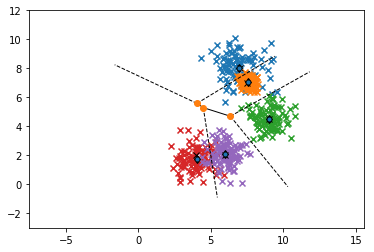

In [31]:
# Use Voronoi to compute the Voronoi tessellation on the new centroids and assign to a 
# variable vor

vor = Voronoi(centroids) #use the voronoi function

# Plot the Voronoi tessellation onto the previous axis
voronoi_plot_2d(vor,ax=ax)
ax.set_xlim(-2,10) #set limits
ax.set_ylim(-3,12)

fig

## Reclassifying the data (20 pts)
We will now reclassify the data according to the centroid it is nearest to. Write a function called `classify_data` that takes labelled data and the centroids as input, and returns the re-labelled data. 

The function should:

1. Create a dictionary with k labels to hold your relabelled data (3 pts)
2. Put all the datasets into one flat list or array of dimensions (k*n, 2) (2 pts)
3. For each datapoint:
    - Calculate the distance to each of the centroids, and store the values (10 pts)
    - Assign the current datapoint to the centroid it is closest to (5 pts)
4. return the dictionary of relabelled data (1 pt)

In [32]:
def reclassify_data(labelled_data, cents):
    # Create a dictionary with k labels to hold your relabelled data
    dic = dict() 
    cen0 = []
    cen1 = []
    cen2 = []
    cen3 = []
    cen4 = []

    # Put all the datasets into one flat list or array of dimensions (k*n, 2)
    newlist = []
    for i in labelled_data:
        for point in labelled_data[i]:
            newlist.append(point)        
    
    # For each datapoint:
    for point in newlist:
        distance = 1000 #set high initial distance
        # Calculate the distance to each of the centroids, and store the values
        for centroid in cents:
            eucD = euc_dist(point,centroid) #calculate distance to centroid
            if eucD < distance: #if euclidean distance is smaller than current distance, assign new centroid
                distance = eucD
                closestCentroid = centroid
                  
        #compare the centroids to find the right centroid, 
        #after that, assign the point to a centroid.
        if np.array_equal(closestCentroid, cents[0]) == True:
            cen0.append(point)
        elif np.array_equal(closestCentroid, cents[1]) == True:
            cen1.append(point)
        elif np.array_equal(closestCentroid, cents[2]) == True:
            cen2.append(point)
        elif np.array_equal(closestCentroid, cents[3]) == True:
            cen3.append(point)
        else: 
            cen4.append(point)        
                   
    # Assign the current datapoint to the centroid it is closest to
    dic[0] = np.array(cen0)
    dic[1] = np.array(cen1)
    dic[2] = np.array(cen2)
    dic[3] = np.array(cen3)
    dic[4] = np.array(cen4)
    
    return dic 

In [33]:
# Call the function to reclassify your data
reclassified_data = reclassify_data(data, centroids)

## Plotting the reclassified data (5 points)
1. Create a new figure and axis (1 pt)
2. Plot the reclassified data (2 pts)
3. Plot the centroids (1 pt)
4. Plot the Voronoi tessellation on the same axis (1 pt)

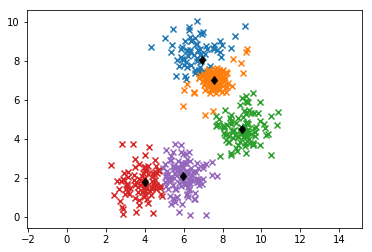

In [34]:
#  Create a new figure and axis and plot the reclassified data
fig2, ax2 = plt.subplots()

for key in reclassified_data:
    # plt.scatter(")" takes a list of x values and a list of y values, 
    # so we assign the transpose of the datapoints to the tuple (x, y)
    (x,y) = np.array(reclassified_data[key]).T
    plt.scatter(x, y, marker = 'x')
plt.axis('equal')
    
# Plot the centroid
for centroid in centroids:
    (x, y) = centroid
    ax2.plot(x, y, marker = 'd',color='black')  


C:\Users\tinat\Anaconda3\lib\site-packages\scipy\spatial\_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


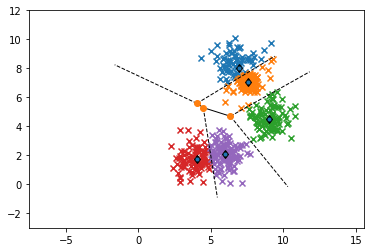

In [35]:
# Plot the Voronoi tessellation on the same axis
vor = Voronoi(centroids)
voronoi_plot_2d(vor,ax=ax2)
ax2.set_xlim(-2,10)
ax2.set_ylim(-3,12)

fig2

## Comparing concepts (25 points)
We now have two different labellings of the same data. Thinking of each label as a concept, compute the distance between the labellings.

I.e., compute the Haussdorff distance between the set of points under label 1 in the original labelling, and in the second labelling.

1. Write a function that computes the distance between one point and a set of points, using the equation

 $$ d_S(x, Y) = \inf\{d(x, y) | y \in Y\} $$
 
 where $d(x, y)$ is the distance between two points. (10 points)
 
2. Write a function that calculates the distance between two non-empty sets, using the equation

$$ d_{SS}(X, Y) = \sup\{d_S(x,Y) | x \in X\} $$ (10 points)

3. Write a function to calulate the Hausdorff distance between $X$ and $Y$, using the equation

$$ d_H(X, Y) = \max\{d_SS(X, Y), d_SS(Y, X)\} $$ (5 points)

In [36]:
# 1. Write a function that calculates the distance between one point and a set of points. 
# The function should take two arguments: a numpy array of shape (2, ) and a numpy array of shape (n, 2). 
# The function should return a scalar
def dS(x, Y):
    minDis = []
    # Check that the variables are the right shape
    if (x.shape == (2, )) & (Y.shape == (len(Y), 2)):
        # Iterate through the values in Y and calculate the distance to x measured by Euclidean distance.
        for y in Y:
            distance = euc_dist(x,y)
            minDis.append(distance)
        return min(minDis) # return the minimum distance
    
    else:
        return print('Wrong shapes!, check your if your input has the right shapes.')
    
    

In [37]:
# 2. Write a function that calculates a distance between two sets of points
# The function should take two arguments: a numpy array of shape (n, 2) and a numpy array of shape (n, 2). 
# The function should return a scalar
def dSS(X, Y):
    # check that the variables are the right shape
    distances = []
    if (X.shape == (len(X), 2)) & (Y.shape == (len(Y), 2)):
        # iterate through the values in X, calculate the distance to Y measured by dS. Return the maximum distance to Y
        for x in X:
            distances.append((dS(x,Y)))  
        return max(distances)
    
    else:
        return print('Wrong shapes!, check your if your input has the right shapes.')


In [38]:
# 3. Write a function that calculates the Haussdorff distance between X and Y:
def dH(X, Y):
    return max(dSS(X,Y),dSS(Y,X))   # return the maximum of dSS(X, Y) and dSS(Y, X)

Now, use `dH(X, Y)` to calculate the distances between each concept in the two different labellings.

In [39]:
#calculate all the distances for each concept
print('The Hausdorff distance for concept 1 is: {}'.format(dH(data[0],reclassified_data[0])))
print('The Hausdorff distance for concept 2 is: {}'.format(dH(data[1],reclassified_data[1])))
print('The Hausdorff distance for concept 3 is: {}'.format(dH(data[2],reclassified_data[2])))
print('The Hausdorff distance for concept 4 is: {}'.format(dH(data[3],reclassified_data[3])))
print('The Hausdorff distance for concept 5 is: {}'.format(dH(data[4],reclassified_data[4])))

The Hausdorff distance for concept 1 is: 2.510583509327503
The Hausdorff distance for concept 2 is: 1.619131504859149
The Hausdorff distance for concept 3 is: 0.5751098532966392
The Hausdorff distance for concept 4 is: 1.1168479919324774
The Hausdorff distance for concept 5 is: 0.7164501678723533
